# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
df = pd.read_csv('Bank_data.csv')
df

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [3]:
df1 = df.copy()
df1 = df1.drop(['Unnamed: 0'], axis = 1) 
df1['y'] = df1['y'].map({'yes':1, 'no':0})
df1

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [4]:
df1.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [5]:
y_train = df1['y']
x1 = df1['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [6]:
x = sm.add_constant(x1)
model_log = sm.Logit(y_train,x)
model_train = model_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


# Checking the summary

In [7]:
#model_train.describe()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 02 Oct 2020   Pseudo R-squ.:                  0.2121
Time:                        16:35:05   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

# Getting insights from the data

# MLE : a.k.a Maximum likelihood estimation 
            > likelihood function wich estimates how our model describes the relationship of variables.
            > tries to find for which values the likelihood is the highest.
           
# Log-likelihood - convenient way when performing MLE
            > it is mostly negative
            > higher it is better the model (-282.89 is good)
# LL-Null - it gives the log-likelihood of a model which has no independent variable.
            > compare likelihood with ll null to see if model has any sort of explanatory of the independent variable 


# LLR : a.k.a Log-Likelihood ratio
           > similar to f-test of linear regression
           > measures if our model is significantl to LL-Null a useless model
# Note : we can estimate if our model is significant from LLR p-value lower the value significant our model is : here we have LLR p-value=5.387e-35(very low) so model can be estimated to be significant.
 

# Pseudo R-squared.
## The Pseudo R-squared here is McFadden's Pseudo R-Squared
    > It states as follows:
###    A good Pseudo R-squared is somewhere between 0.2 and 0.4 . This measure is mostly useful for comparing             variations of the same model.
## We have Pseudo R-squared value is 0.2121 so our model can be estimated to be good

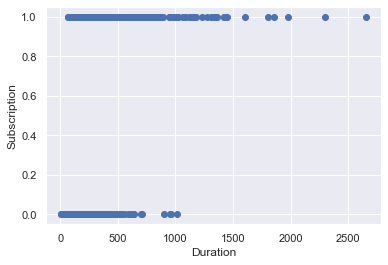

In [8]:
plt.scatter(x1,y_train,color = 'C0')
plt.xlabel('Duration')
plt.ylabel('Subscription')
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [9]:
cols = ['interest_rate','credit','march','previous','duration']
x_new= df1[cols]

In [10]:
X = sm.add_constant(x_new)
reg_logit = sm.Logit(y_train,X)
results_logit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


In [11]:
results_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.514     
Dependent Variable: y                AIC:              360.7836  
Date:               2020-10-02 16:35 BIC:              386.2834  
No. Observations:   518              Log-Likelihood:   -174.39   
Df Model:           5                LL-Null:          -359.05   
Df Residuals:       512              LLR p-value:      1.2114e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0211   0.3113 -0.0677 0.9460 -0.6313  0.5891
interest_rate     -0.8001   0.0895 -8.9434 0.0000 -0.9755 -0.6248
credit             2.3585   1.0875  2.1688 0.0301  0.2271  4.4900
march             -1.8322   0.3297 -5.5563 0.0000 -2.4785 -1.1859
previous           1.5363   0.5010  3.0666 0.0022  0.5544  2.5182
duration           0.0070   0.0007  9.3810 0.0000  0.0055  0.0084
=================================================================

"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

In [12]:
def confusion_matrix(data,actual_values,model):
        pred_values = model.predict(data)
        bins=np.array([0,0.5,1])
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        return cm, accuracy

In [13]:
confusion_matrix(X,y_train,results_logit)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

In [14]:
print("the accuracy of the model is {} %".format(confusion_matrix(X,y_train,results_logit)[1]*100))

the accuracy of the model is 86.2934362934363 %


In [15]:
cm_df = pd.DataFrame(results_logit.pred_table())
cm_df.columns = ['Predicted:0','Predicted:1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted:0,Predicted:1
Actual 0,218.0,41.0
Actual 1,30.0,229.0


## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [16]:
df2 = pd.read_csv('Bank_data_testing.csv')

In [17]:
df_test = df2.copy()
df_test = df_test.drop(['Unnamed: 0'], axis = 1)

In [25]:
df_test['y'] = df2.y.map({'yes':1,'no':0})

In [26]:
df_test.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0


### Declare the dependent and the independent variables

In [27]:
y_test = df_test['y']
x_t = df_test[cols]

In [28]:
X.head()

,const,interest_rate,credit,march,previous,duration
0,1.0,1.334,0.0,1.0,0.0,117.0
1,1.0,0.767,0.0,0.0,1.0,274.0
2,1.0,4.858,0.0,1.0,0.0,167.0
3,1.0,4.120,0.0,0.0,0.0,686.0
4,1.0,4.856,0.0,1.0,0.0,157.0


In [29]:
x_test = sm.add_constant(x_t)
x_test.head()

,const,interest_rate,credit,march,previous,duration
0,1.0,1.313,0.0,1.0,0.0,487.0
1,1.0,4.961,0.0,0.0,0.0,132.0
2,1.0,4.856,0.0,1.0,0.0,92.0
3,1.0,4.120,0.0,0.0,0.0,1468.0
4,1.0,4.963,0.0,0.0,0.0,36.0


Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [30]:
confusion_matrix(x_test,y_test,results_logit)

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)

In [33]:
print("the accuracy of the model is {} %".format(confusion_matrix(x_test,y_test,results_logit)[1]*100))

the accuracy of the model is 86.03603603603604 %
